# Bank Authentication Classifier with Tensorflow

I will be using tensorflow to classify whether a bank note is authentic or not using the Bank Authentication Data Set from the UCI repository.

This project was completed as part of the online course "Python for Data Science and Machine Learning Bootcamp"

# Importing Libraries and Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
bn = pd.read_csv('bank_note_data.csv')

In [5]:
bn.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bn.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
bn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


This is what we are told about the columns:
* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

# Exploratory Data Analysis

In [8]:
import pandas_profiling

In [9]:
pandas_profiling.ProfileReport(bn)

Number of variables,5
Number of observations,1372
Total Missing (%),0.0%
Total size in memory,53.7 KiB
Average record size in memory,40.1 B
Numeric,4
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


We see that there are no missing values and that the class data is fairly balanced. However, we see the alert for 24 duplicate rows. We should look at them.

In [10]:
bn[bn.duplicated()]

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


Due to the data source, it makes sense that there would be some duplicates, as, hopefully, most bank notes are incredibly similar. The variation that does exist among the real bank notes we can hypothesize is due to the image taking of the note.

C:\Users\Brandon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Brandon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Brandon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


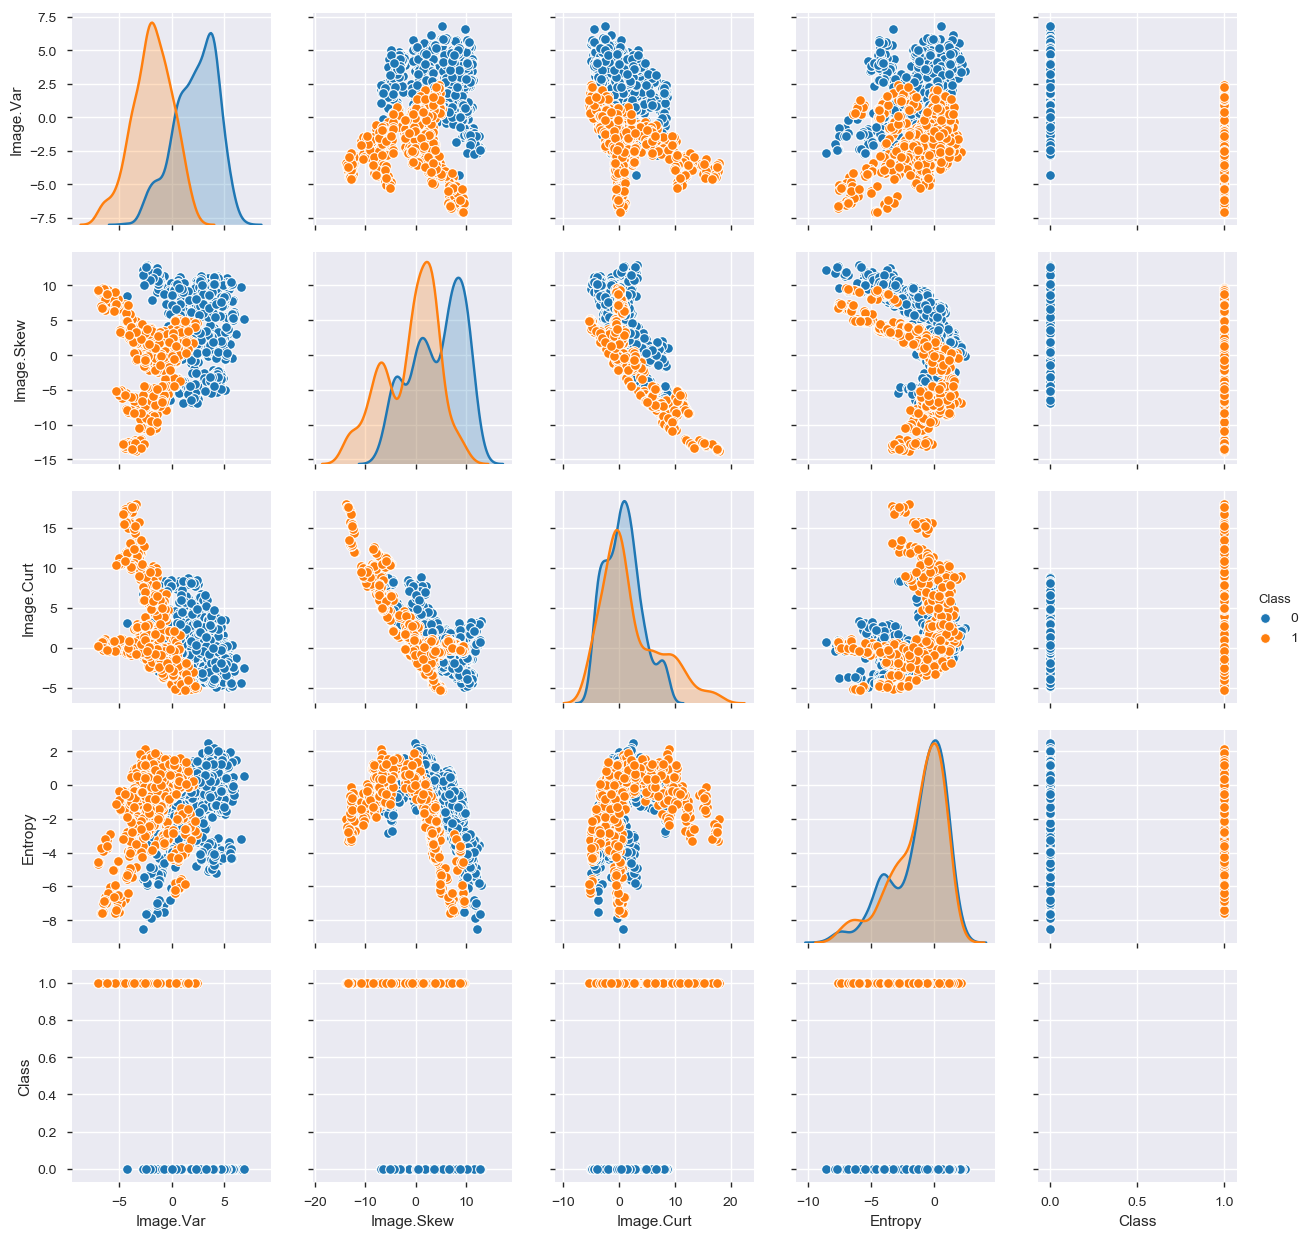

In [11]:
sns.pairplot(bn, hue='Class')

Visually, it looks like the data is at least somewhat seperable on the image skew and the image variance.

# Data Preparation

It's always a good idea to standardize the data, especially for Neural Networks/Deep Learning. Although it may not impact our data as much, we'll still utilize this best practice.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(bn.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(bn.drop('Class',axis=1))
bn_scaled=pd.DataFrame(scaled_features,columns=bn.columns[:-1])
bn_scaled.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = bn_scaled
y = bn['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training Model using Tensorflow

In [18]:
import tensorflow as tf

In [19]:
X.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [20]:
#changing columns to tensor variables
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [21]:
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [22]:
#input training function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

In [23]:
#input evaluation function
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=3,feature_columns=feat_cols)

W0728 11:18:23.855925 94296 estimator.py:1811] Using temporary folder as model directory: C:\Users\Brandon\AppData\Local\Temp\tmpufj9b0lw


In [24]:
#training model
classifier.train(input_fn=input_func,steps=50)

W0728 11:18:57.146774 94296 deprecation.py:323] From C:\Users\Brandon\Anaconda3\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0728 11:18:57.230717 94296 deprecation.py:323] From C:\Users\Brandon\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0728 11:18:57.233716 94296 deprecation.py:323] From C:\Users\Brandon\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner

# Model Evaluation


In [25]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size = len(X_test),shuffle=False)

In [26]:
note_predictions=list(classifier.predict(input_fn=pred_fn))

W0728 11:20:38.100959 94296 deprecation.py:323] From C:\Users\Brandon\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [27]:
note_predictions[0]

{'logits': array([-4.645887  ,  0.63017905, -5.3255744 ], dtype=float32),
 'probabilities': array([0.00507342, 0.99235547, 0.00257109], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1, 2]),
 'all_classes': array([b'0', b'1', b'2'], dtype=object)}

In [28]:
final_preds=[]
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [30]:
final_preds[:6]

[1, 0, 1, 1, 1, 0]

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test,final_preds),classification_report(y_test,final_preds))

[[219  12]
 [  0 181]]               precision    recall  f1-score   support

           0       1.00      0.95      0.97       231
           1       0.94      1.00      0.97       181

   micro avg       0.97      0.97      0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



Our model does fairly well, especially in that it appears to minimize the Type 1 Errors in which, in this case, we don't want to make the error that we predict something as being true but it's actually a fake. It's better to predict it a fake and investigate in general. Of course, this depends on how much investigating costs you, but the assumption is that it would be better than falsely predict a bank note is true and letting it pass.

I'm going to quickly compare this model to a standard Random Forest Classifier to see what standards our deep learning model are up against for this dataset.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)

In [36]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc_pred=rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test,rfc_pred),classification_report(y_test,rfc_pred))

[[229   2]
 [  2 179]]               precision    recall  f1-score   support

           0       0.99      0.99      0.99       231
           1       0.99      0.99      0.99       181

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In this case, a "normal" random forest classifier outperforms our deep learning model! This just goes to show that just because it is a deep learning model, doesn't mean it will outperform simpler and more explainable models.

# Conclusion

I created a deep learning classifier using tensorflow to try and classify bank notes as either real or fake. While deep learning brings much advantage, especially to complex datasets for image recognition, sometimes a less complicated approach can perform just as well or even better, with the added bonus of more explainability of the model. 